In [541]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import re
from numerize import numerize
import warnings
warnings.filterwarnings('ignore')

# Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import ensemble

In [482]:
#Unzip file
from zipfile import ZipFile
import zipfile

#Zipping File
filepath=os.getcwd()
with zipfile.ZipFile('online+retail.zip', 'r') as zip_ref:
    zip_ref.extractall(filepath)

In [483]:
# specifying the path to csv files
path = os.getcwd()
  
# excel files in the path
files = glob.glob(path + "/*.xlsx")
  
# defining an empty list to store 
# content
data_frame = pd.DataFrame()
content = []
  
# checking all the excel files in the 
# specified path
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    df = pd.read_excel(filename, index_col=None)
    content.append(df)
  
# converting content to data frame
data_frame = pd.concat(content)

In [484]:
# Altering the DataFrame
df = df[['CustomerID','InvoiceDate', 'InvoiceNo', 'StockCode', 'Description','Quantity','UnitPrice','Country']]

In [485]:
#Remove all unwanted white space from dataset
df = df.replace(r'\s+', ' ', regex=True)

In [486]:
df.head()

,CustomerID,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
0,17850.0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,17850.0,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom
2,17850.0,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom
3,17850.0,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom
4,17850.0,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom


In [487]:
print("==="*25)
print("Data Information")
print("==="*25)
print(df.info())

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   406829 non-null  float64       
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   InvoiceNo    541909 non-null  object        
 3   StockCode    541909 non-null  object        
 4   Description  540455 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [488]:
#Checking null values percentage
print("==="*25)
print("Checking Data has null values or not")
print("==="*25)
print(round(df.isnull().sum() * 100 / len(df),2))

Checking Data has null values or not
CustomerID     24.93
InvoiceDate     0.00
InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
UnitPrice       0.00
Country         0.00
dtype: float64


***Review***
- There are null values in #CustomerID & #Description as null values are around 25%.We can drop subset of Description as we won't lose much data

In [489]:
#Drop NA from Description columns
df=df.dropna(subset='Description')

In [490]:
#Data Shape
print("**"*30)
print(f"Shape of the data are as follow {df.shape[0]} rows & {df.shape[1]} Columns")
print("**"*30)

************************************************************
Shape of the data are as follow 540455 rows & 8 Columns
************************************************************


In [491]:
#Descriptive Stats
df.describe().T

,count,mean,min,25%,50%,75%,max,std
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
InvoiceDate,540455,2011-07-04 16:20:42.947035392,2010-12-01 08:26:00,2011-03-28 11:49:00,2011-07-20 11:38:00,2011-10-19 11:49:00,2011-12-09 12:50:00,NaN
Quantity,540455.0,9.603129,-80995.0,1.0,3.0,10.0,80995.0,218.007598
UnitPrice,540455.0,4.623519,-11062.06,1.25,2.08,4.13,38970.0,96.889628


In [492]:
#Descriptive Stats
df.describe(include=object).T

,count,unique,top,freq
InvoiceNo,540455,24446,573585,1114
StockCode,540455,3958,85123A,2313
Description,540455,4216,WHITE HANGING HEART T-LIGHT HOLDER,2369
Country,540455,38,United Kingdom,494024


***Checking Unique***

In [493]:
df['InvoiceNo'].unique()

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

***Review***
- As we don't have to keep cancel transaction.

In [494]:
df['StockCode'].unique()

array(['85123A', 71053, '84406B', ..., '90214U', '47591b', 23843],
      dtype=object)

***Error***

- There is "D" & there should be only 5 digit but this column also contains letter's.
- How to deal with it

In [495]:
df[df['StockCode']=='D']

,CustomerID,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
141,14527.0,2010-12-01 09:41:00,C536379,D,Discount,-1,27.50,United Kingdom
9038,14527.0,2010-12-05 13:21:00,C537164,D,Discount,-1,29.29,United Kingdom
14498,15498.0,2010-12-07 12:34:00,C537597,D,Discount,-1,281.00,United Kingdom
19392,17340.0,2010-12-08 16:00:00,C537857,D,Discount,-1,267.12,United Kingdom
31134,16422.0,2010-12-15 09:14:00,C538897,D,Discount,-1,5.76,United Kingdom
...,...,...,...,...,...,...,...,...
479868,14527.0,2011-11-18 12:06:00,C577227,D,Discount,-1,19.82,United Kingdom
479869,14527.0,2011-11-18 12:06:00,C577227,D,Discount,-1,16.76,United Kingdom
493613,14912.0,2011-11-23 12:29:00,C578239,D,Discount,-1,26.33,Italy
516221,14527.0,2011-11-30 17:34:00,C579884,D,Discount,-1,20.53,United Kingdom


***Review***
- As we can see *D* define as discount and it is of no use cause it as quantity is also -1 which has no use in dataset

In [496]:
#Select only positive values
df=df[df['Quantity']>=0]

#Also remove char from StockCode
#df['StockCode'].str.extract(',(\w*\.?) ')

In [497]:
#'^[0-9]{5}[a-z]$'

In [498]:
df['StockCode']

0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: StockCode, Length: 530693, dtype: object

In [499]:
#Adding str values in front of string as it was not taking last letter
df['StockCode'] = 'str' + df['StockCode'].astype(str)

#Extract Numeric Values only
df['Stock_Code'] = df['StockCode'].str.extractall(r"([0-9]+)").groupby(level=0).sum(numeric_only=False)

In [500]:
df[df['Stock_Code'].isnull()]

,CustomerID,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Stock_Code
45,12583.0,2010-12-01 08:45:00,536370,strPOST,POSTAGE,3,18.00,France,NaN
386,12791.0,2010-12-01 11:27:00,536403,strPOST,POSTAGE,1,15.00,Netherlands,NaN
1123,12662.0,2010-12-01 13:04:00,536527,strPOST,POSTAGE,1,18.00,Germany,NaN
1814,NaN,2010-12-01 14:32:00,536544,strDOT,DOTCOM POSTAGE,1,569.77,United Kingdom,NaN
2239,16274.0,2010-12-01 15:35:00,536569,strM,Manual,1,1.25,United Kingdom,NaN
...,...,...,...,...,...,...,...,...,...
541216,12518.0,2011-12-09 10:13:00,581494,strPOST,POSTAGE,2,18.00,Germany,NaN
541540,NaN,2011-12-09 10:26:00,581498,strDOT,DOTCOM POSTAGE,1,1714.17,United Kingdom,NaN
541730,12662.0,2011-12-09 11:59:00,581570,strPOST,POSTAGE,1,18.00,Germany,NaN
541767,12526.0,2011-12-09 12:09:00,581574,strPOST,POSTAGE,2,18.00,Germany,NaN


***REVIEW***
- As you can see StockCode and Description contaning POSTAGE, as we can't put these type of data in machine learning.

In [501]:
#Drop StockCode
df.drop(columns=['StockCode'],inplace=True)

#Drop NaN from Stock_Code
df=df.dropna(subset='Stock_Code') 

In [502]:
df['CustomerID'].fillna(value='Unknown',inplace=True)

***Why i replace #CustomerID with "unknown", reason - only for visualization***

***As of now we don't have any null values we can go forward***

### ***Remove Outliers***

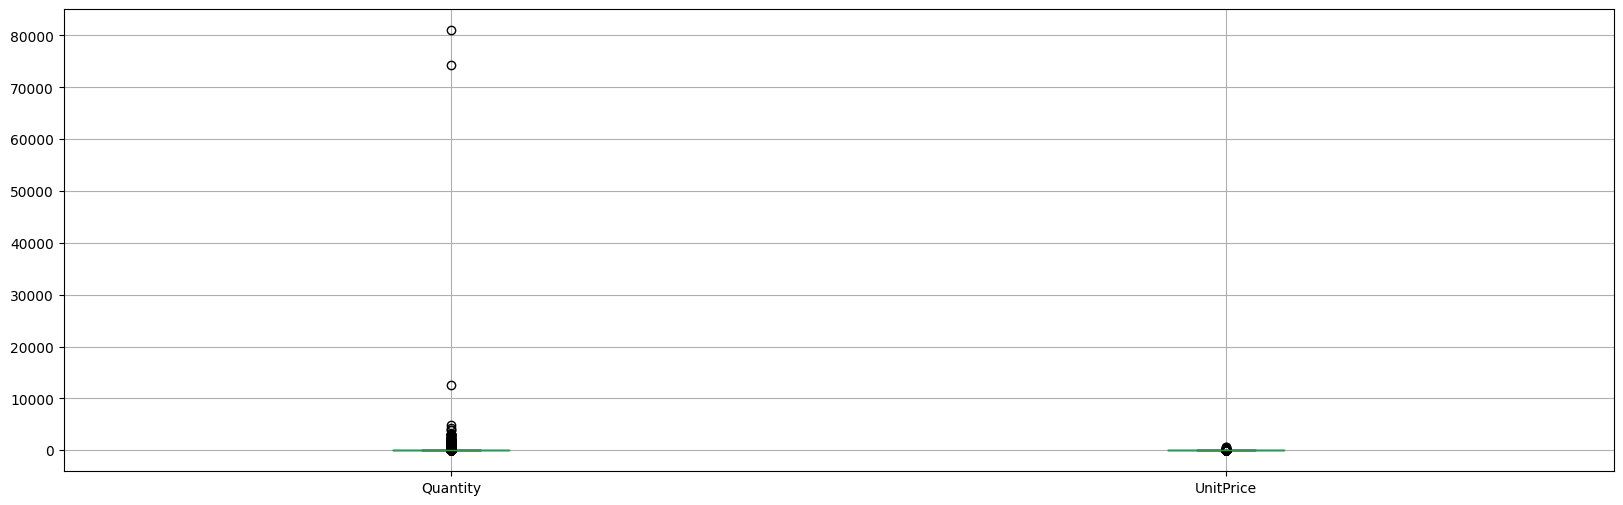

In [503]:
# Create plot box for multiple columns
plt.figure(figsize=(20,6))
b_plot = df.boxplot(column = ['Quantity', 'UnitPrice']) 
b_plot.plot()
plt.show()

In [504]:
df.shape

(528484, 8)

In [505]:
# Calculate percentiles
q_low = df["Quantity"].quantile(0.25)
q_hi  = df["Quantity"].quantile(0.75)

IQR=q_hi-q_low

# Filter out outliers
df=df[~((df['Quantity']<(q_low-1.5*IQR)) | (df['Quantity']>(q_hi+1.5*IQR)))]

In [506]:
# Calculate percentiles
q_low = df["UnitPrice"].quantile(0.25)
q_hi  = df["UnitPrice"].quantile(0.75)

IQR=q_hi-q_low

# Filter out outliers
df=df[~((df['UnitPrice']<(q_low-1.5*IQR)) | (df['UnitPrice']>(q_hi+1.5*IQR)))]

### ***Calculate IQR*** |||||

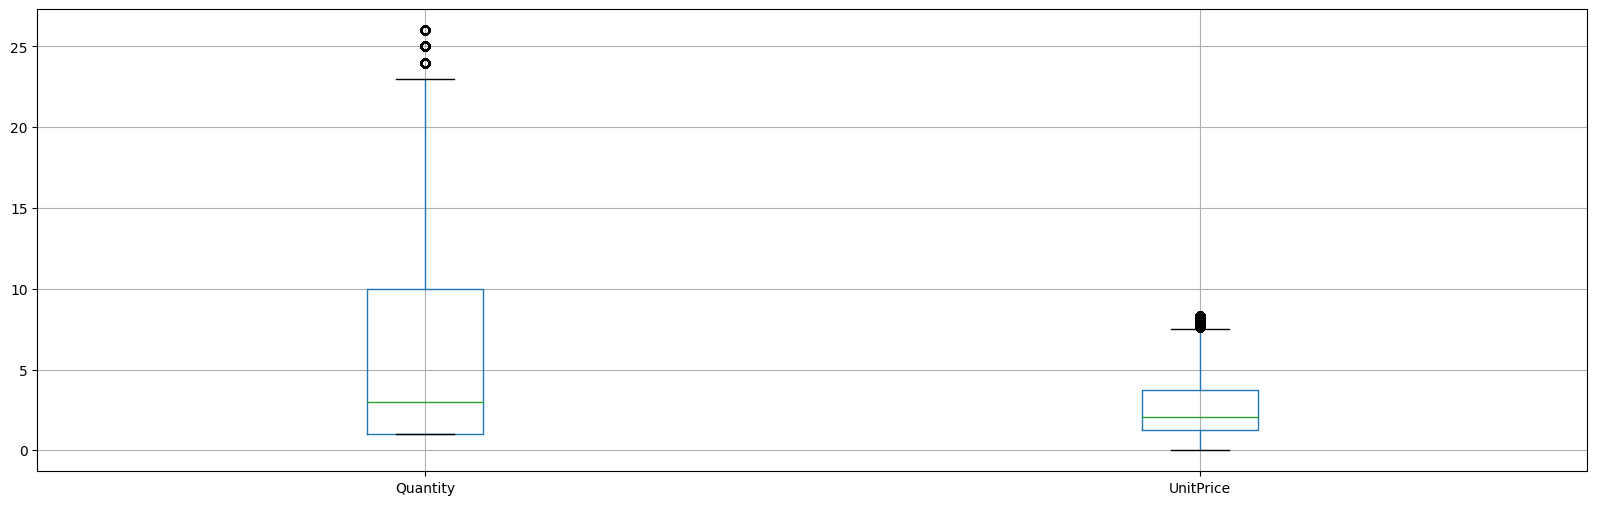

In [507]:
# Create plot box for multiple columns
plt.figure(figsize=(20,6))
b_plot = df.boxplot(column = ['Quantity', 'UnitPrice']) 
b_plot.plot()
plt.show()

In [508]:
df.shape

(465496, 8)

## ***Exploratory Data Analysis***

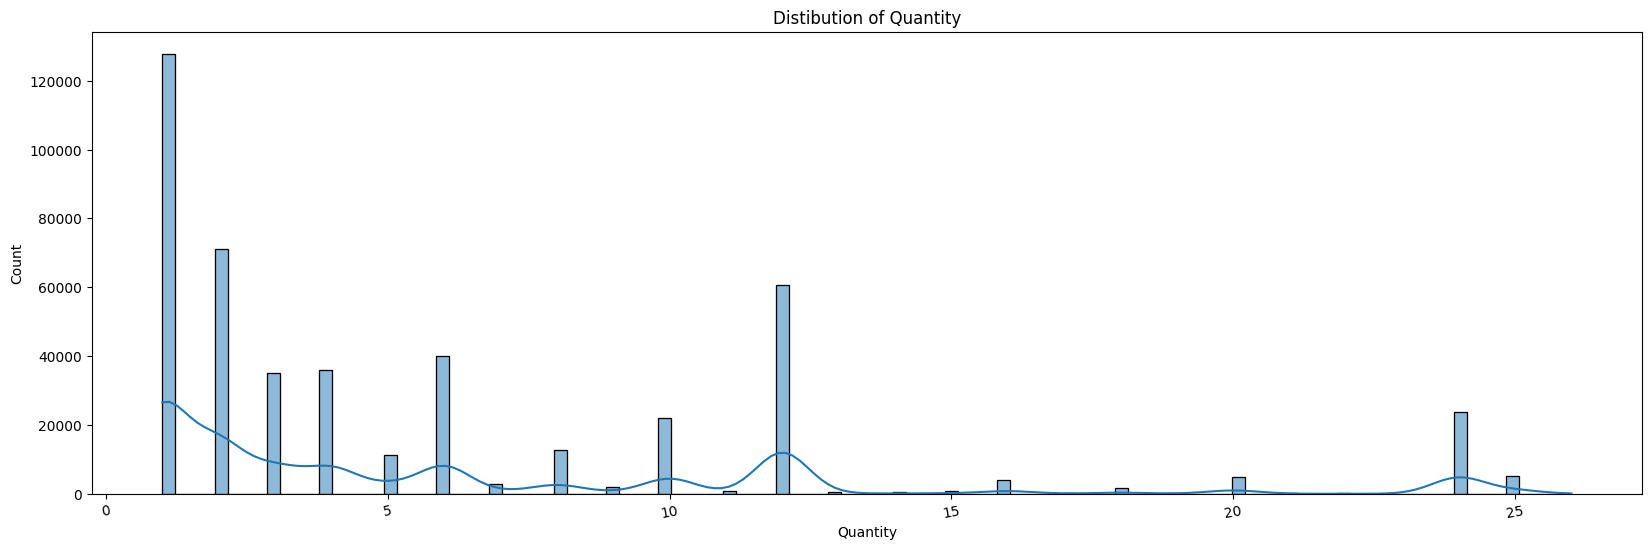

In [509]:
#Hist plot for Quantity
plt.figure(figsize=(20,6))
sns.histplot(data=df['Quantity'],kde=True)
plt.title('Distibution of Quantity')
plt.xticks(rotation=10)
plt.show()

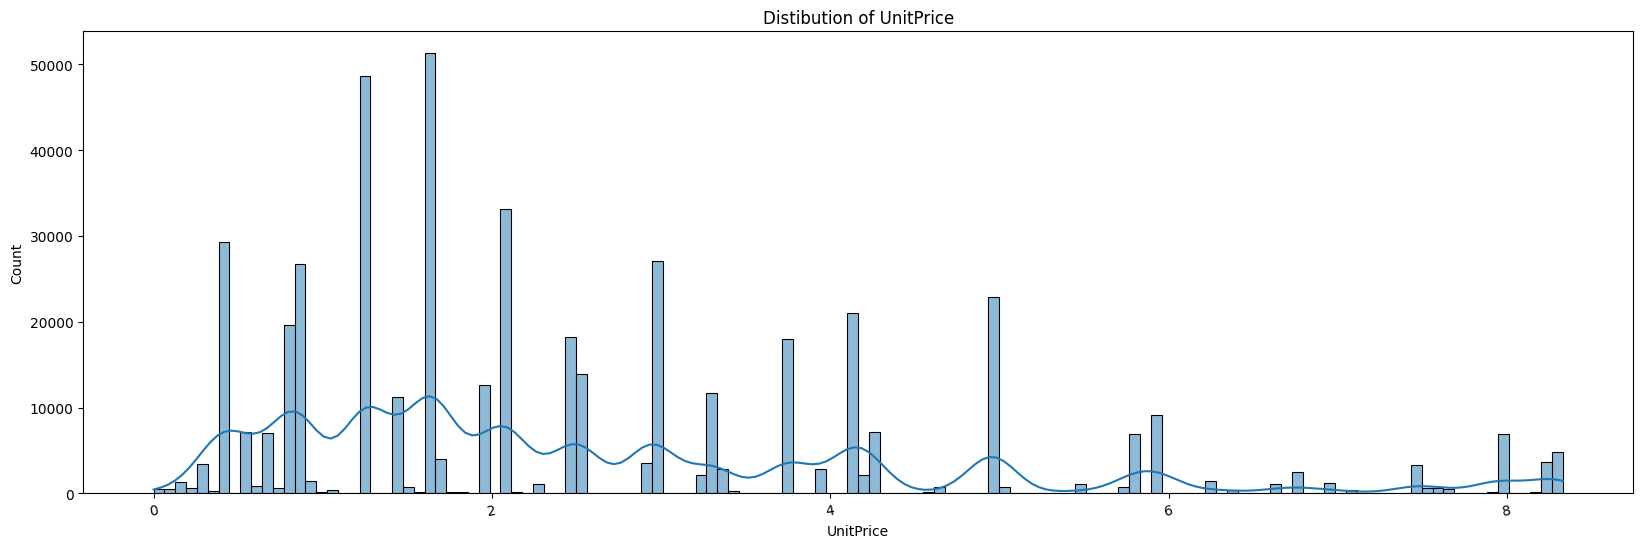

In [510]:
#Hist plot for UnitPrice
plt.figure(figsize=(20,6))
sns.histplot(data=df['UnitPrice'],kde=True)
plt.title('Distibution of UnitPrice')
plt.xticks(rotation=10)
plt.show()

In [511]:
df.head()

,CustomerID,InvoiceDate,InvoiceNo,Description,Quantity,UnitPrice,Country,Stock_Code
0,17850.0,2010-12-01 08:26:00,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,85123
1,17850.0,2010-12-01 08:26:00,536365,WHITE METAL LANTERN,6,3.39,United Kingdom,71053
2,17850.0,2010-12-01 08:26:00,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,84406
3,17850.0,2010-12-01 08:26:00,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,84029
4,17850.0,2010-12-01 08:26:00,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,84029


(14975.0, 15317.0)

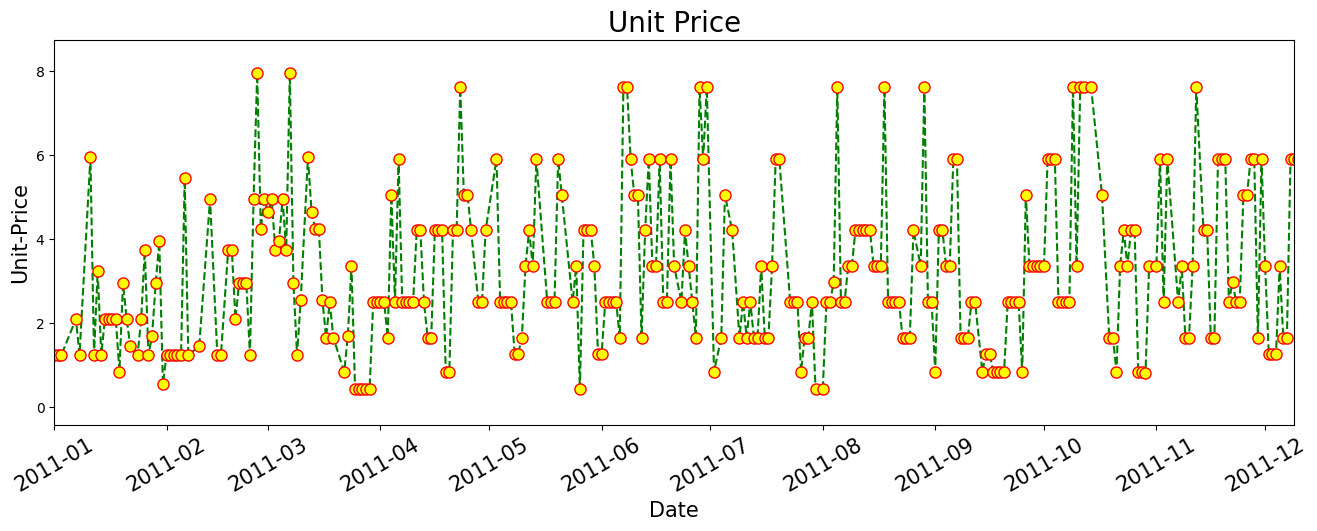

In [512]:
# Adjusting the figure size
fig = plt.subplots(figsize=(16, 5))

# Creating a plot
#plt.plot(df.index, df['UnitPrice'])
plt.plot(df.index, df['UnitPrice'], marker='o',color='green', markerfacecolor='yellow',linestyle='dashed', markeredgecolor='red', markersize=8)
# Adding a plot title and customizing its font size
plt.title('Unit Price', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=15)
plt.ylabel('Unit-Price', fontsize=15)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=30, fontsize=15)

# Changing the plot resolution - zooming in the period from 2011-01-01 till 2011-12-09
plt.xlim(pd.Timestamp('2011-01-01'), pd.Timestamp('2011-12-09'))

(14975.0, 15317.0)

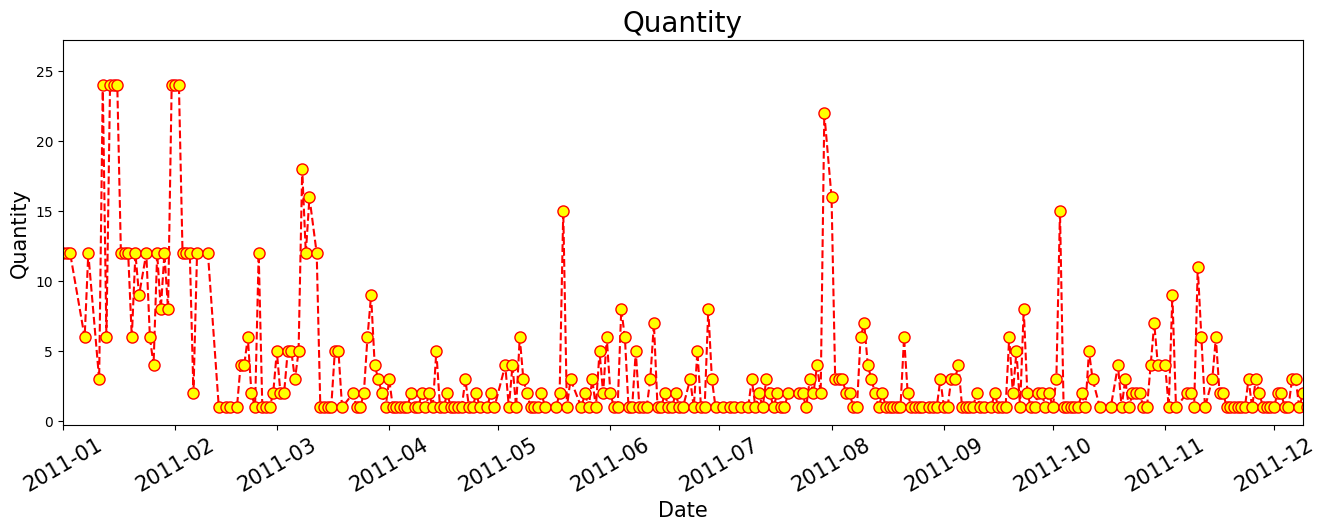

In [513]:
# Adjusting the figure size
fig = plt.subplots(figsize=(16, 5))

# Creating a plot
#plt.plot(df.index, df['UnitPrice'])
plt.plot(df.index, df['Quantity'], marker='o',color='red', markerfacecolor='yellow',linestyle='dashed', markeredgecolor='red', markersize=8)
# Adding a plot title and customizing its font size
plt.title('Quantity', fontsize=20)

# Adding axis labels and customizing their font size
plt.xlabel('Date', fontsize=15)
plt.ylabel('Quantity', fontsize=15)

# Rotaing axis ticks and customizing their font size
plt.xticks(rotation=30, fontsize=15)

# Changing the plot resolution - zooming in the period from 2011-01-01 till 2011-12-09
plt.xlim(pd.Timestamp('2011-01-01'), pd.Timestamp('2011-12-09'))

In [514]:
df.columns

Index(['CustomerID', 'InvoiceDate', 'InvoiceNo', 'Description', 'Quantity',
       'UnitPrice', 'Country', 'Stock_Code'],
      dtype='object')

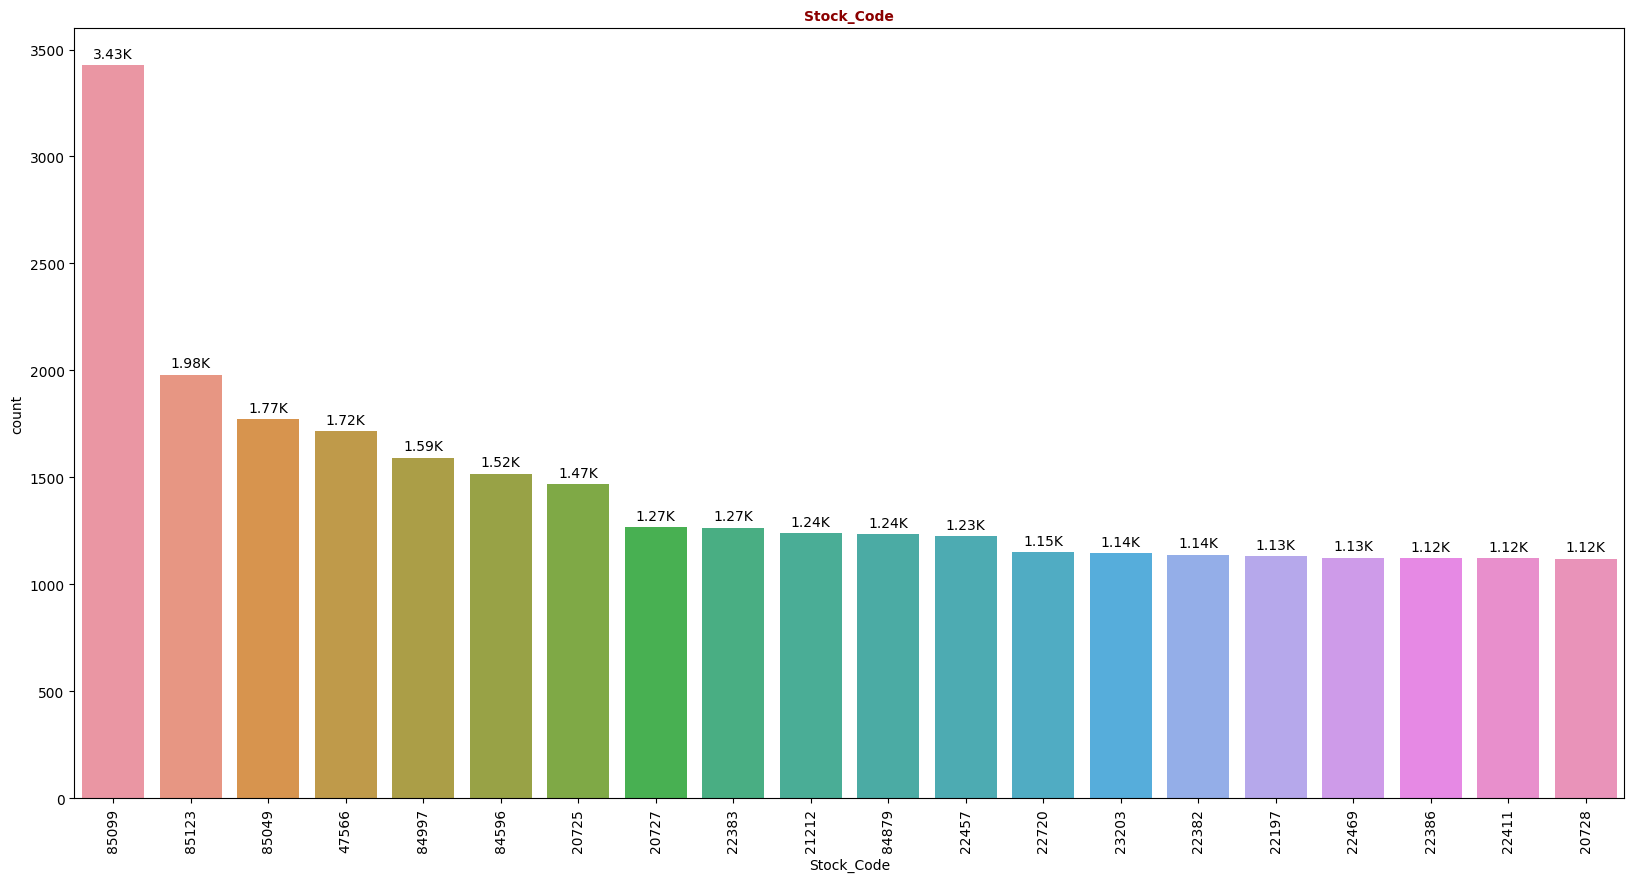

In [515]:
fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Stock_Code", ax = ax,order=df['Stock_Code'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Stock_Code", fontsize = 10, fontweight = "bold", color = "darkred")
plt.xticks(rotation=90)
fig.show()

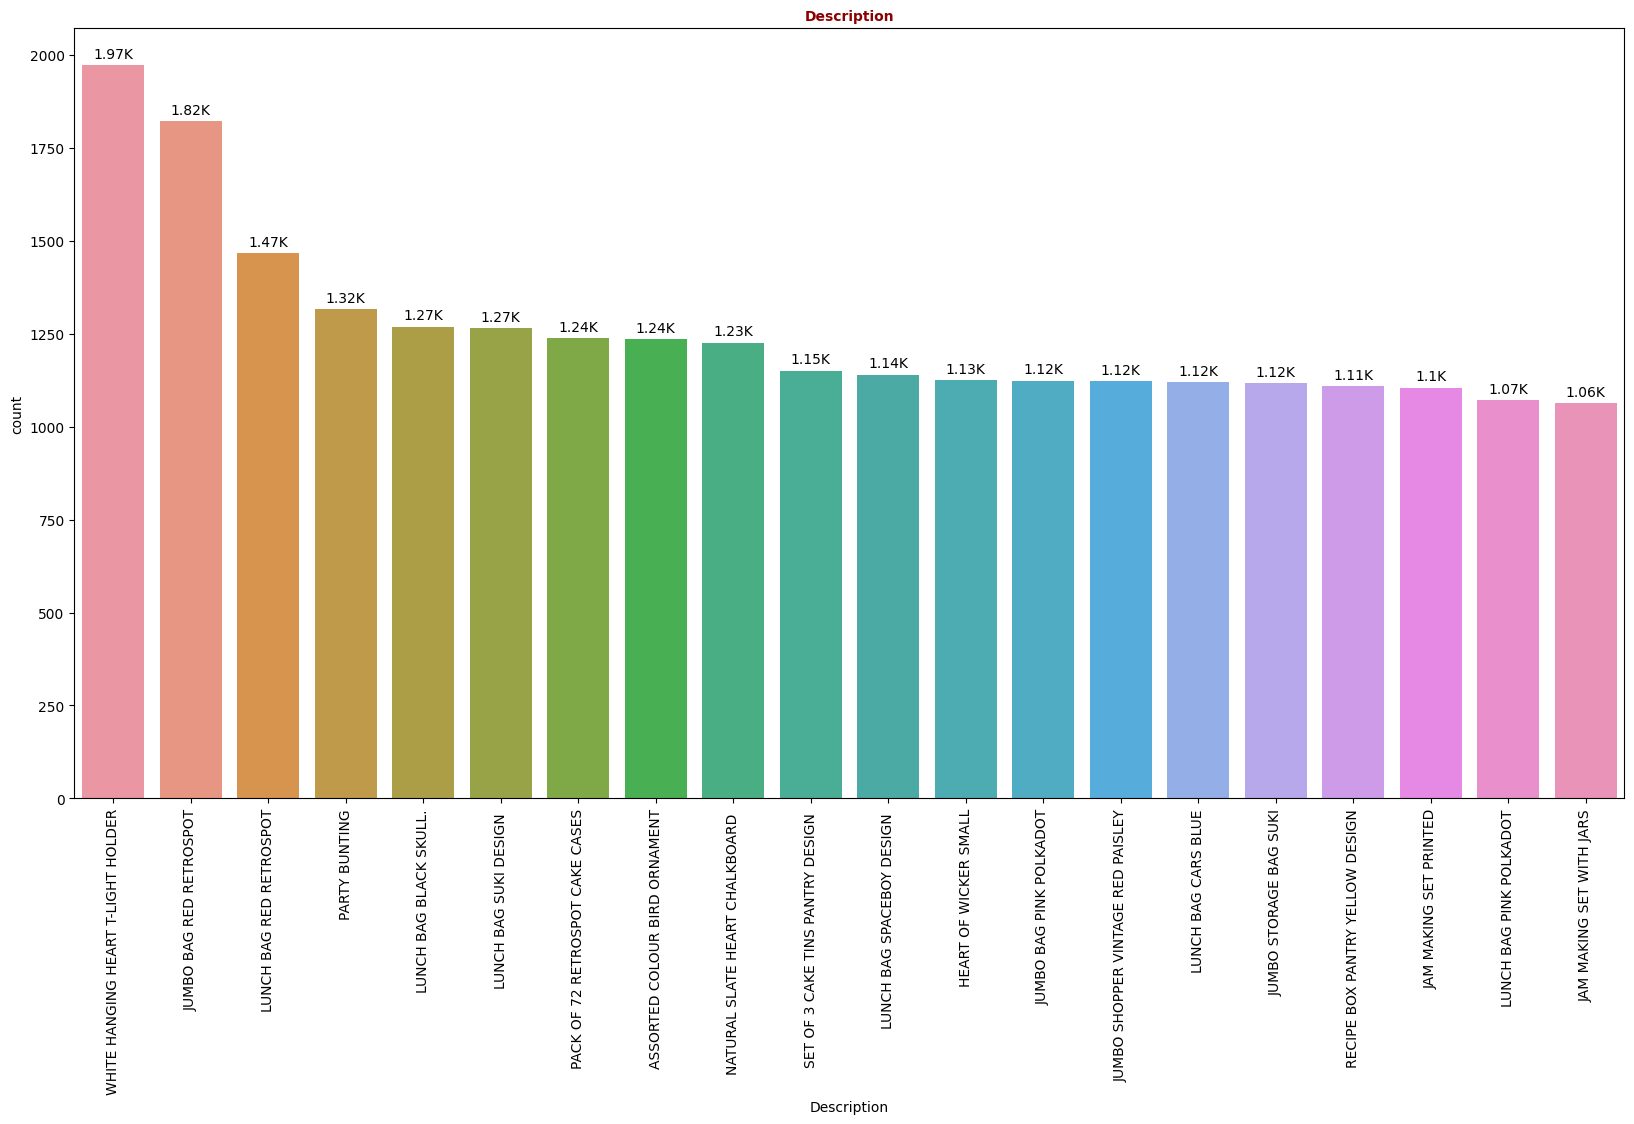

In [516]:
fig,ax = plt.subplots(figsize = (20,10))
sns.countplot(df, x = "Description", ax = ax,order=df['Description'].value_counts().iloc[:20].index)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")
ax.set_title("Description", fontsize = 10, fontweight = "bold", color = "darkred")
plt.xticks(rotation=90)
fig.show()

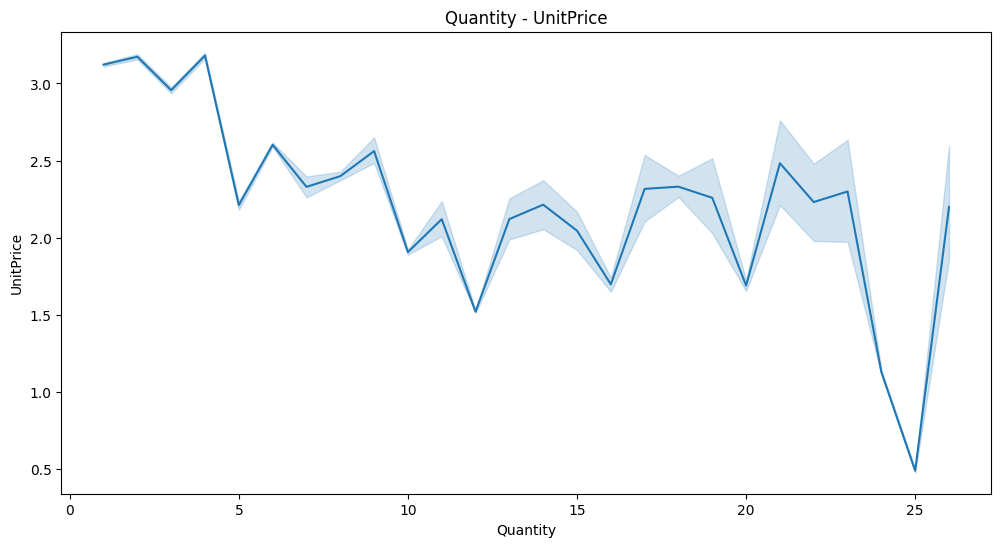

In [517]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Quantity', y='UnitPrice', data=df)
plt.title("Quantity - UnitPrice")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.show()

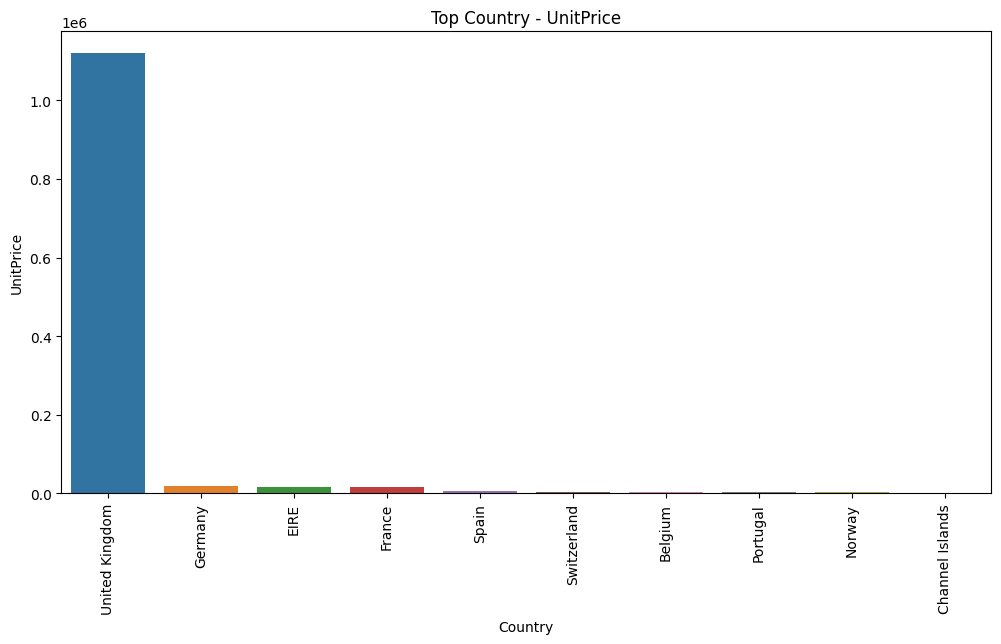

In [518]:
most_country_unit_price = df.groupby('Country')['UnitPrice'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_country_unit_price.index, y=most_country_unit_price.values)
plt.xticks(rotation=90)
plt.title("Top Country - UnitPrice")
plt.xlabel("Country")
plt.ylabel("UnitPrice")
plt.show()

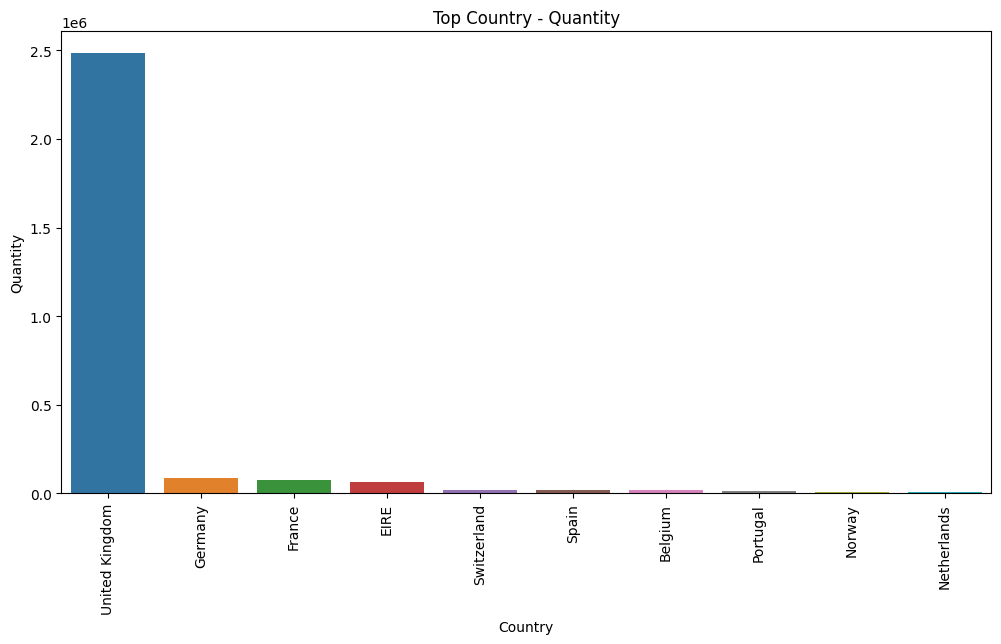

In [519]:
most_country_Quantity = df.groupby('Country')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_country_Quantity.index, y=most_country_Quantity.values)
plt.xticks(rotation=90)
plt.title("Top Country - Quantity")
plt.xlabel("Country")
plt.ylabel("Quantity")
plt.show()

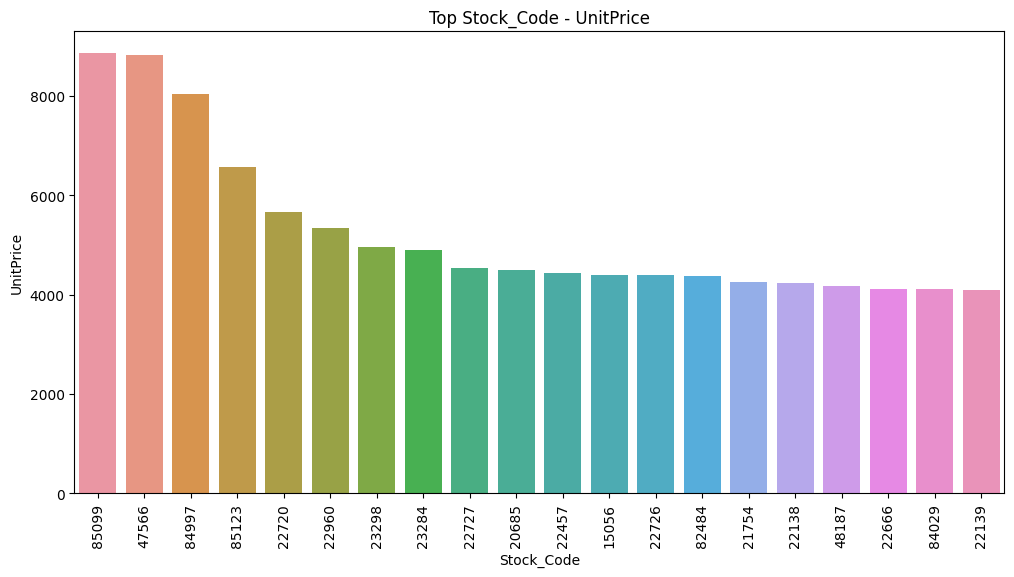

In [520]:
most_stock_unit_price = df.groupby('Stock_Code')['UnitPrice'].sum().nlargest(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_stock_unit_price.index, y=most_stock_unit_price.values)
plt.xticks(rotation=90)
plt.title("Top Stock_Code - UnitPrice")
plt.xlabel("Stock_Code")
plt.ylabel("UnitPrice")
plt.show()

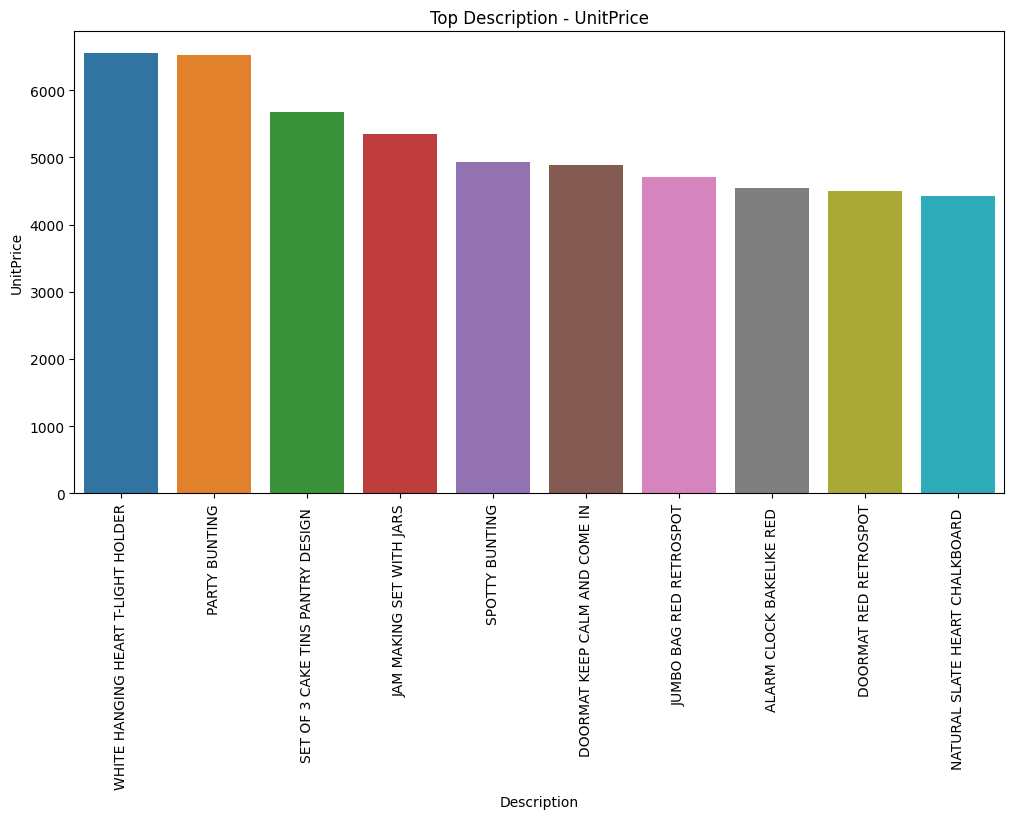

In [521]:
top_description_unit_price = df.groupby('Description')['UnitPrice'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_description_unit_price.index, y=top_description_unit_price.values)
plt.xticks(rotation=90)
plt.title("Top Description - UnitPrice")
plt.xlabel("Description")
plt.ylabel("UnitPrice")
plt.show()

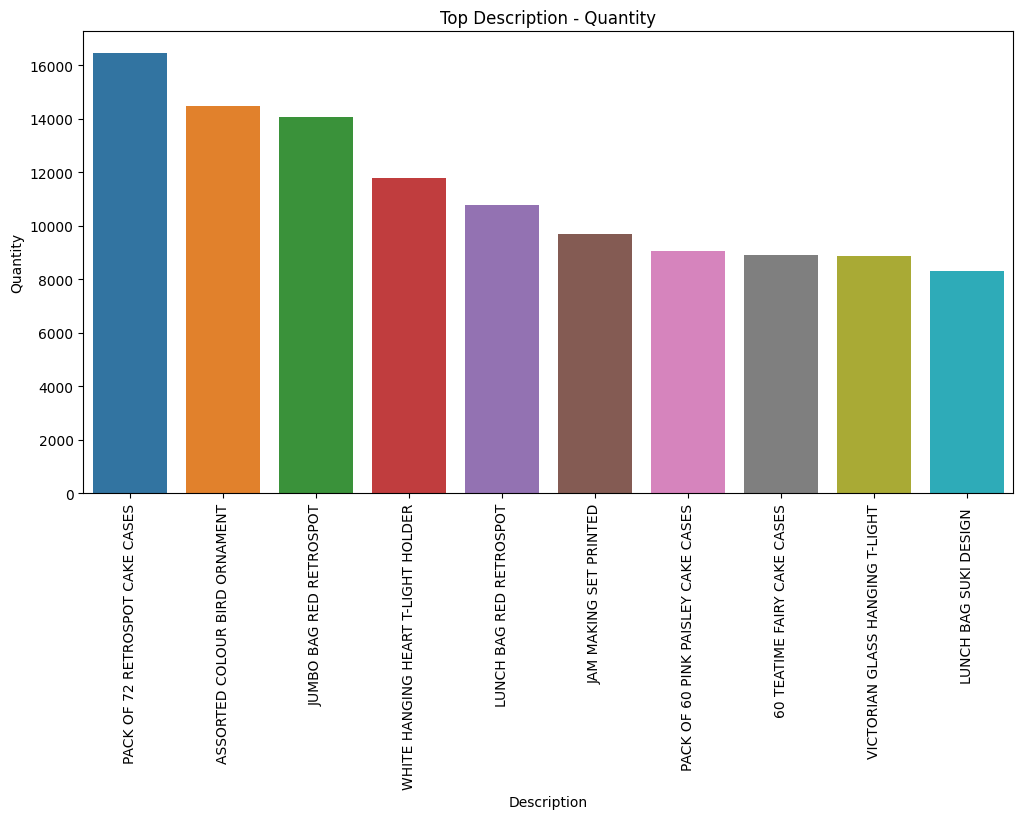

In [522]:
top_description_quantity = df.groupby('Description')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_description_quantity.index, y=top_description_quantity.values)
plt.xticks(rotation=90)
plt.title("Top Description - Quantity")
plt.xlabel("Description")
plt.ylabel("Quantity")
plt.show()

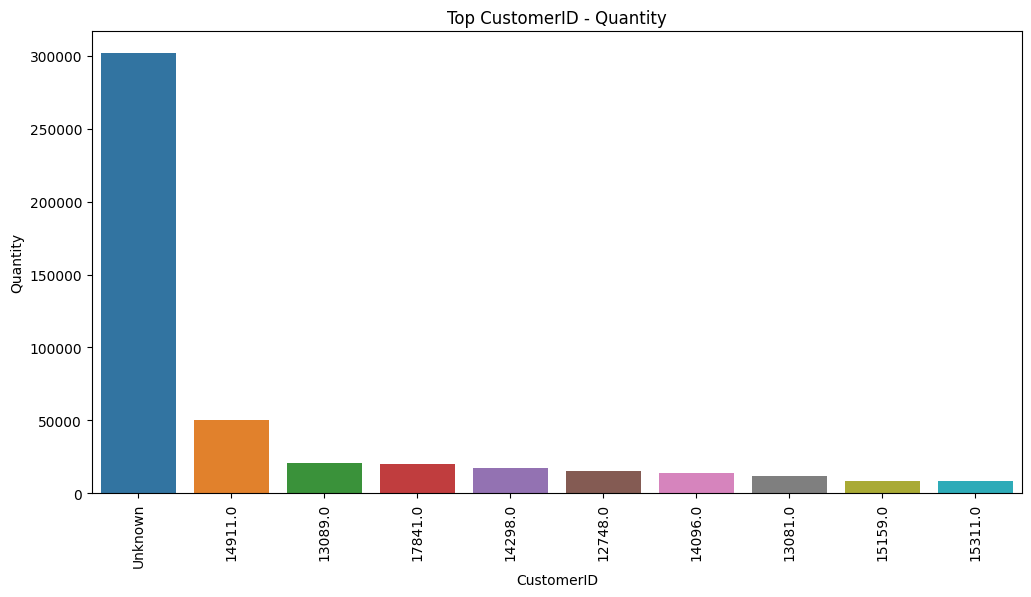

In [523]:
top_CustomerID_quantity = df.groupby('CustomerID')['Quantity'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_CustomerID_quantity.index, y=top_CustomerID_quantity.values)
plt.xticks(rotation=90)
plt.title("Top CustomerID - Quantity")
plt.xlabel("CustomerID")
plt.ylabel("Quantity")
plt.show()

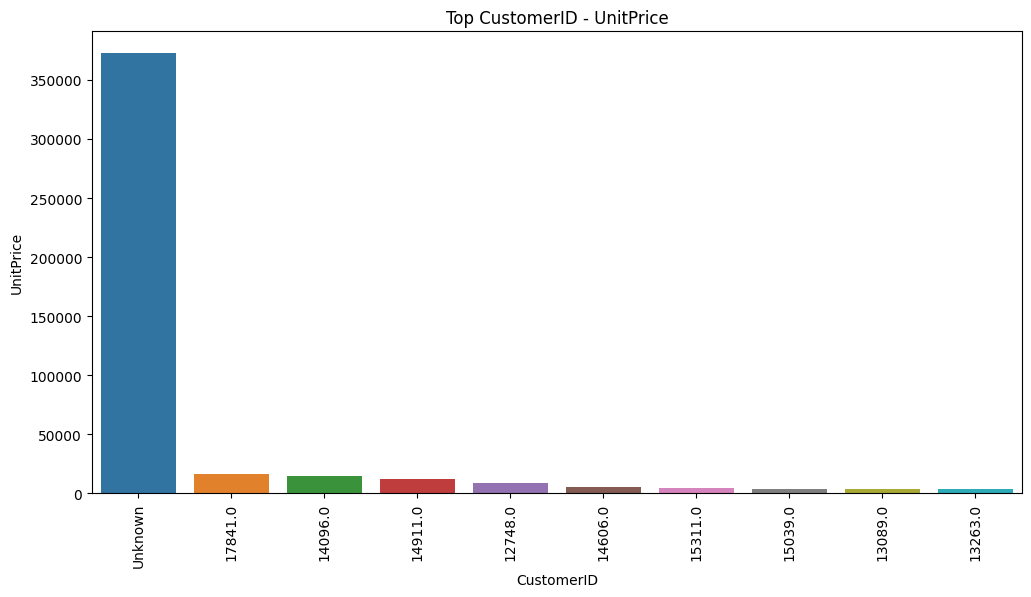

In [524]:
top_CustomerID_UnitPrice = df.groupby('CustomerID')['UnitPrice'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_CustomerID_UnitPrice.index, y=top_CustomerID_UnitPrice.values)
plt.xticks(rotation=90)
plt.title("Top CustomerID - UnitPrice")
plt.xlabel("CustomerID")
plt.ylabel("UnitPrice")
plt.show()

In [526]:
# Calculate total spending for each customer
df['TotalSpending'] = df['Quantity'] * df['UnitPrice']
df.head()

,CustomerID,InvoiceDate,InvoiceNo,Description,Quantity,UnitPrice,Country,Stock_Code,TotalSpending
0,17850.0,2010-12-01 08:26:00,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,85123,15.30
1,17850.0,2010-12-01 08:26:00,536365,WHITE METAL LANTERN,6,3.39,United Kingdom,71053,20.34
2,17850.0,2010-12-01 08:26:00,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,84406,22.00
3,17850.0,2010-12-01 08:26:00,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,84029,20.34
4,17850.0,2010-12-01 08:26:00,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,84029,20.34


In [529]:
#Create Feature for customers
customer_data=df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'TotalSpending': 'sum',
    'Quantity':'sum'

}).reset_index()
customer_data

,CustomerID,InvoiceNo,TotalSpending,Quantity
0,12347.0,7,3412.53,1905
1,12348.0,3,90.20,140
2,12349.0,1,1197.15,547
3,12350.0,1,294.40,196
4,12352.0,7,1147.44,502
...,...,...,...,...
4192,18281.0,1,46.92,52
4193,18282.0,2,113.13,51
4194,18283.0,16,2046.03,1391
4195,18287.0,3,960.76,778


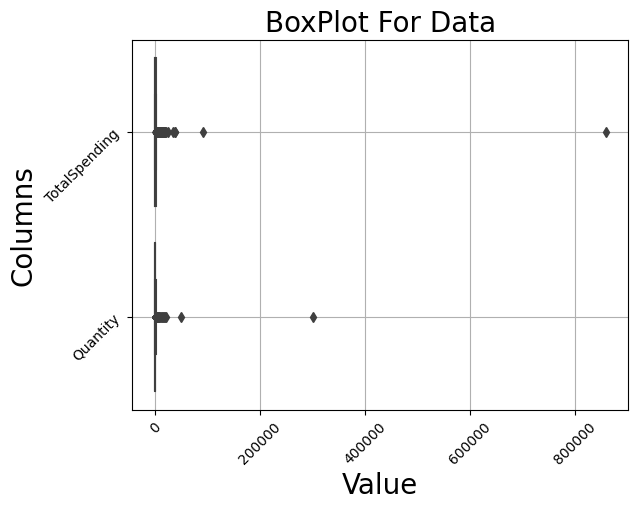

In [530]:
sns.boxplot(data=customer_data[['TotalSpending','Quantity']],orient='h')
plt.title('BoxPlot For Data',fontsize=20)
plt.xlabel('Value',fontsize=20)
plt.ylabel('Columns',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(True)
plt.show()

In [531]:
for i in ['TotalSpending','Quantity']:
    q75,q25 = np.percentile(customer_data[i],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    customer_data[i][customer_data[i]>max]=max
    customer_data[i][customer_data[i]<min]=min

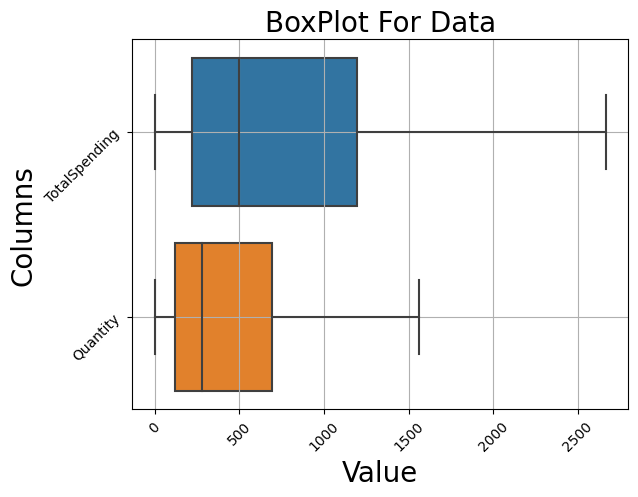

In [532]:
sns.boxplot(data=customer_data[['TotalSpending','Quantity']],orient='h')
plt.title('BoxPlot For Data',fontsize=20)
plt.xlabel('Value',fontsize=20)
plt.ylabel('Columns',fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(True)
plt.show()

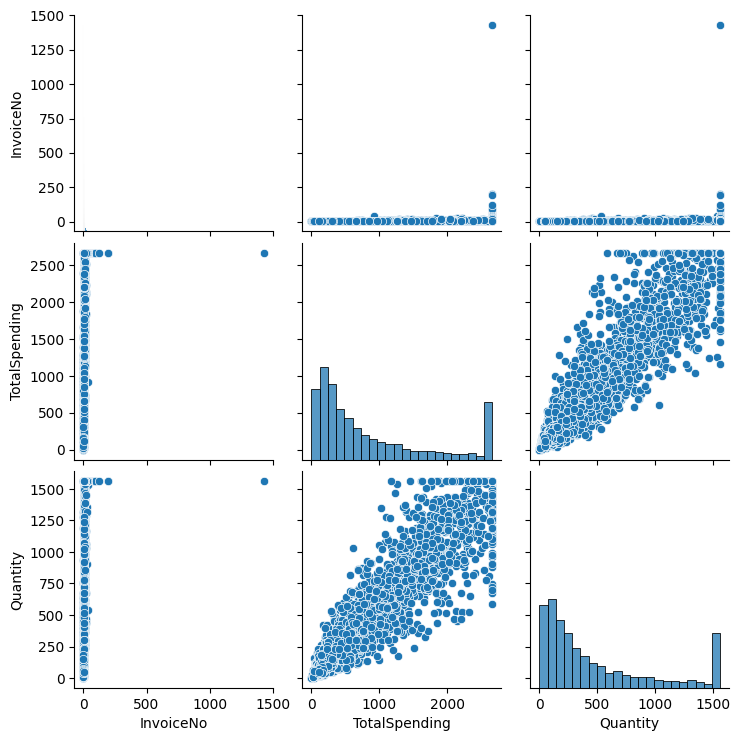

In [533]:
sns.pairplot(data=customer_data)
plt.show()

### ***Model Building***

In [534]:
X=customer_data.iloc[:,1:]
key=X.columns
X.head()

,InvoiceNo,TotalSpending,Quantity
0,7,2665.035,1562
1,3,90.200,140
2,1,1197.150,547
3,1,294.400,196
4,7,1147.440,502


In [537]:
min_max=MinMaxScaler()
X_scal=min_max.fit_transform(X)
X_scal=pd.DataFrame(X_scal,columns=key)
X_scal.head()

,InvoiceNo,TotalSpending,Quantity
0,0.004193,1.000000,1.000000
1,0.001398,0.033156,0.089045
2,0.000000,0.448813,0.349776
3,0.000000,0.109833,0.124920
4,0.004193,0.430147,0.320948


In [538]:
pca=PCA(n_components=2)
X_new=pca.fit_transform(X_scal)
X_new

array([[ 0.97447835, -0.00794774],
       [-0.35343168, -0.04309054],
       [ 0.12517829,  0.06486938],
       ...,
       [ 0.73243259, -0.09401285],
       [ 0.16651348, -0.10266415],
       [ 0.98187643, -0.00318826]])

In [539]:
X_train, X_test= train_test_split(X_new,test_size=0.05, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (3987, 2)
X_test shape is  (210, 2)


In [542]:
wcss = []
n=20
for i in range(1,n):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=44)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
wcss

[766.0396315013629,
 166.48420915130993,
 78.72108165522337,
 49.95318869070329,
 36.83110343192234,
 30.45573971329669,
 26.29593407944623,
 22.629267748820894,
 19.918903247834916,
 17.94583708350542,
 16.32976659953325,
 15.084752084153326,
 13.927830948868682,
 12.998377447245629,
 12.219012467352067,
 11.326518537691948,
 10.823683293261688,
 10.129829928313349,
 9.597825794694343]

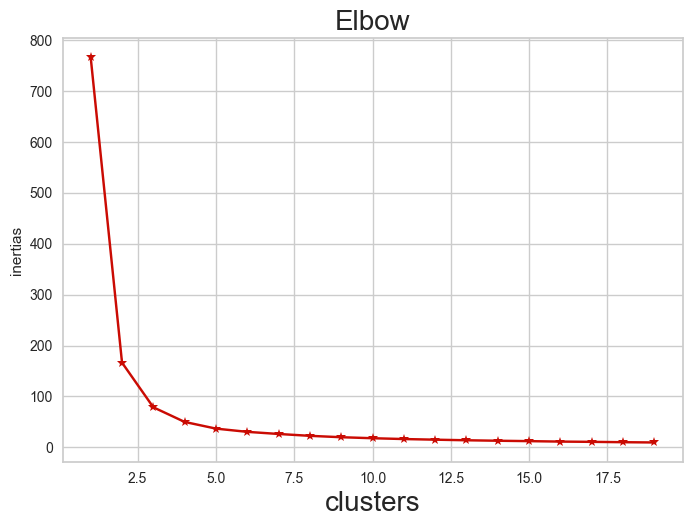

In [543]:
plt.plot(range(1,n),wcss,marker='*',c='r')
plt.title('Elbow',fontsize=20)
plt.xlabel('clusters',fontsize=20)
plt.ylabel('inertias')
plt.show()

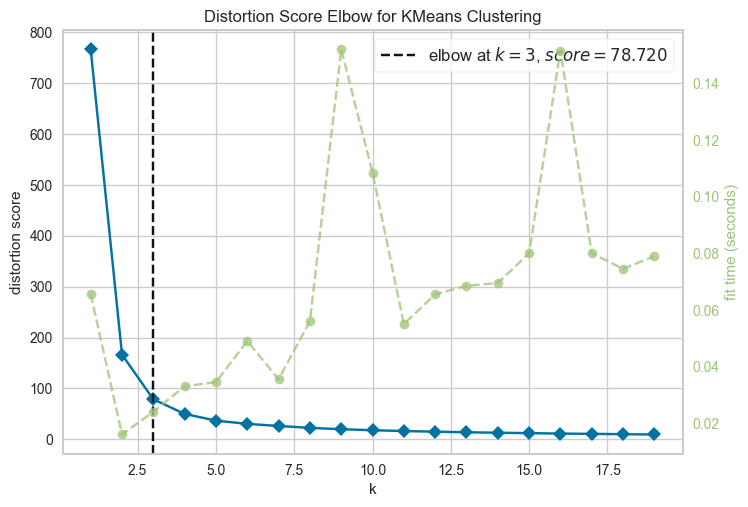

In [544]:
#another way to show number of cluster
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [545]:
#Number Of Cluster 3
KMeansModel = KMeans(n_clusters=3,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[-2.86589651e-01 -1.76129455e-04]
 [ 8.31635461e-01 -8.92470630e-04]
 [ 1.43253728e-01 -3.00690115e-04]]
KMeansModel labels are :  [2 0 2 ... 0 0 0]
KMeansModel intertia is :  78.72108165522337
KMeansModel No. of iteration is :  9


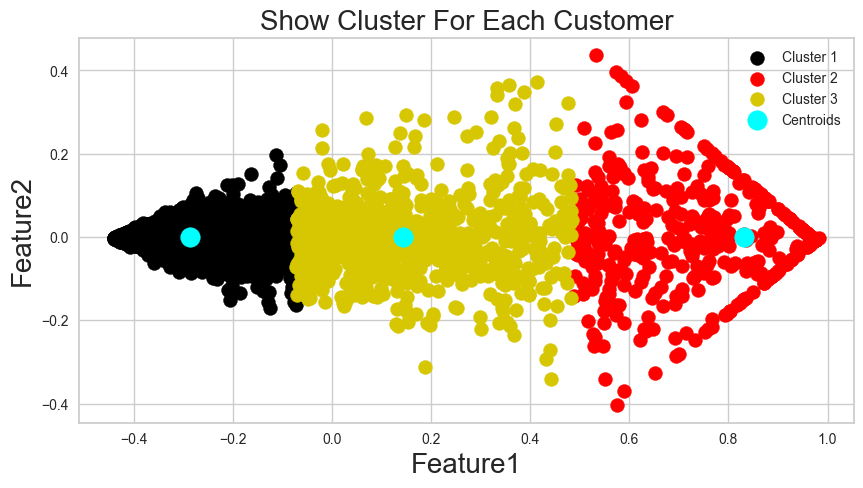

In [546]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(10,5))
plt.scatter(X_train[y==0,0], X_train[y==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_train[y==1,0], X_train[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train[y==2,0], X_train[y==2,1], s=100, c='y', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

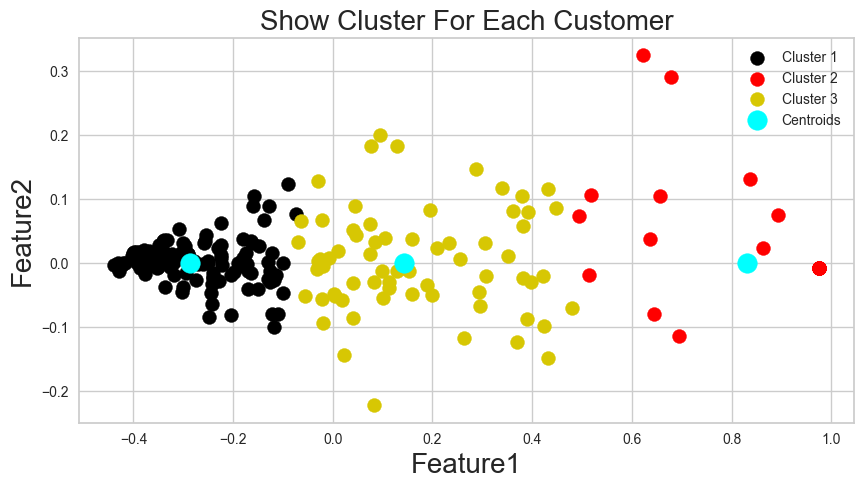

In [547]:
# plotting all the clusters and their Centroids
y_pred=KMeansModel.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X_test[y_pred==0,0], X_test[y_pred==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_test[y_pred==1,0], X_test[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test[y_pred==2,0], X_test[y_pred==2,1], s=100, c='y', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

In [548]:
silhouette_avg = silhouette_score(X_train, y)
print(f'Silhouette Score train: {silhouette_avg}')
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score test: {silhouette_avg}')

Silhouette Score train: 0.6282437488832177
Silhouette Score test: 0.5847619337902601


Compute the mean Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

***AgglomerativeClustering***

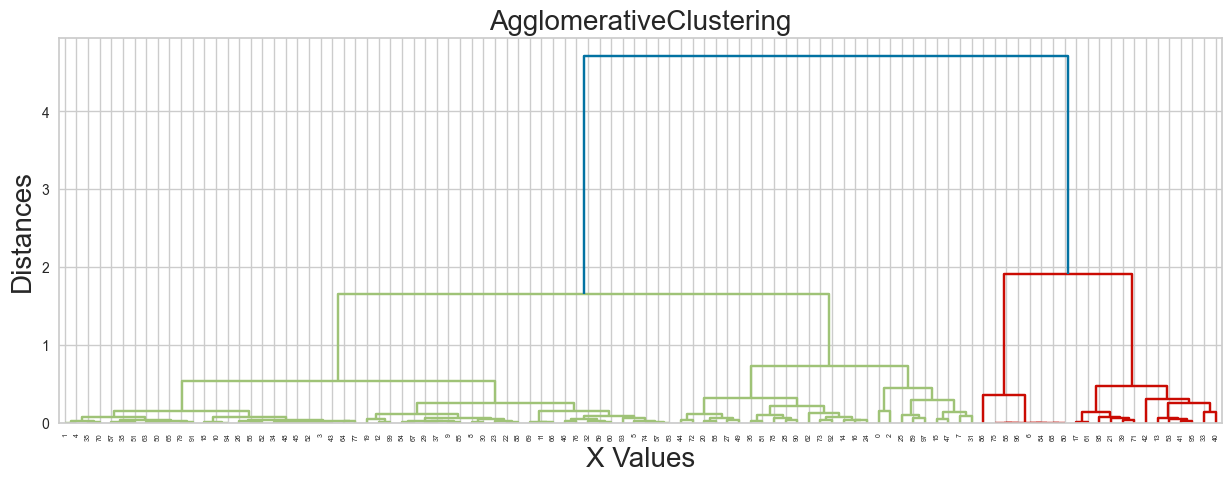

In [549]:
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(X_train[:100,:], method = 'ward'))
plt.title('AgglomerativeClustering',fontsize=20)
plt.xlabel('X Values',fontsize=20)
plt.ylabel('Distances',fontsize=20)
plt.show()

In [550]:
#number of cluster 3 
AggClusteringModel = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y = AggClusteringModel.fit_predict(X_train)
y_pred = AggClusteringModel.fit_predict(X_test)

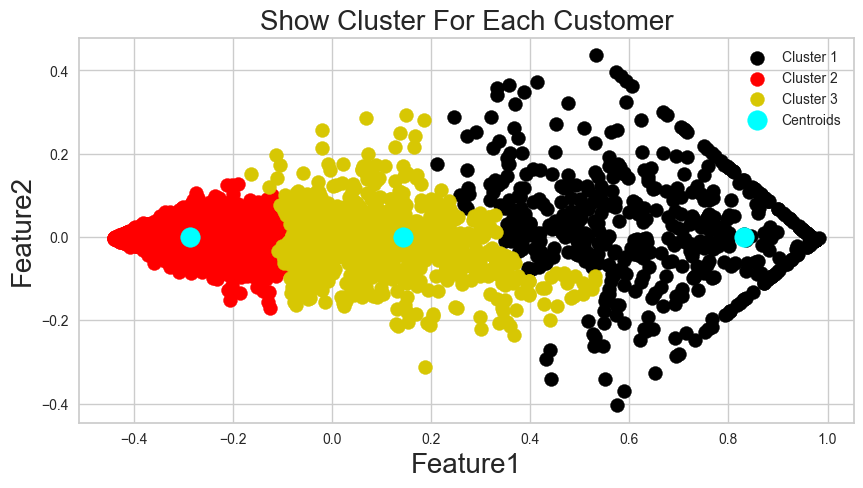

In [551]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(10,5))
plt.scatter(X_train[y==0,0], X_train[y==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_train[y==1,0], X_train[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train[y==2,0], X_train[y==2,1], s=100, c='y', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

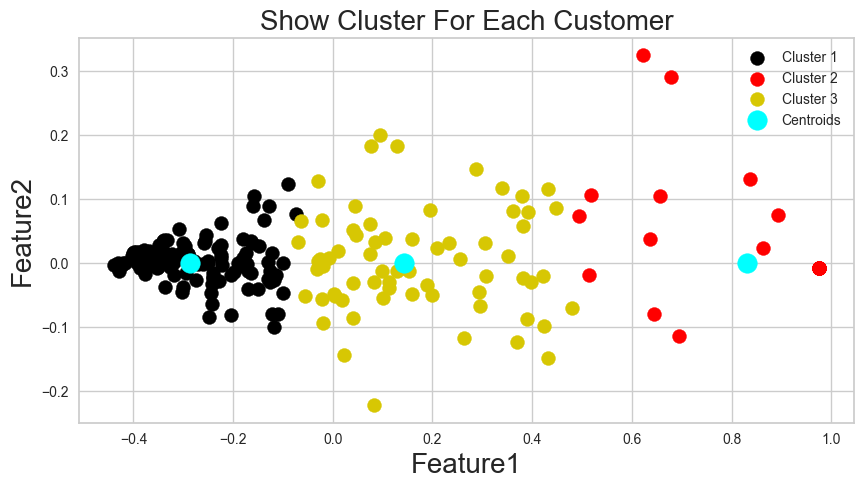

In [552]:
# plotting all the clusters and their Centroids
y_pred=KMeansModel.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X_test[y_pred==0,0], X_test[y_pred==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_test[y_pred==1,0], X_test[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test[y_pred==2,0], X_test[y_pred==2,1], s=100, c='y', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

In [553]:
silhouette_avg = silhouette_score(X_train, y)
print(f'Silhouette Score train: {silhouette_avg}')
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score test: {silhouette_avg}')

Silhouette Score train: 0.5974933902753325
Silhouette Score test: 0.5847619337902601


Second

In [554]:
key=X.iloc[:,1:].columns
X_2=min_max.fit_transform(X.iloc[:,1:])
X_2=pd.DataFrame(X_2,columns=key)
X_2.head()

,TotalSpending,Quantity
0,1.000000,1.000000
1,0.033156,0.089045
2,0.448813,0.349776
3,0.109833,0.124920
4,0.430147,0.320948


In [555]:
X_train, X_test= train_test_split(X_2,test_size=0.05, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)

X_train shape is  (3987, 2)
X_test shape is  (210, 2)


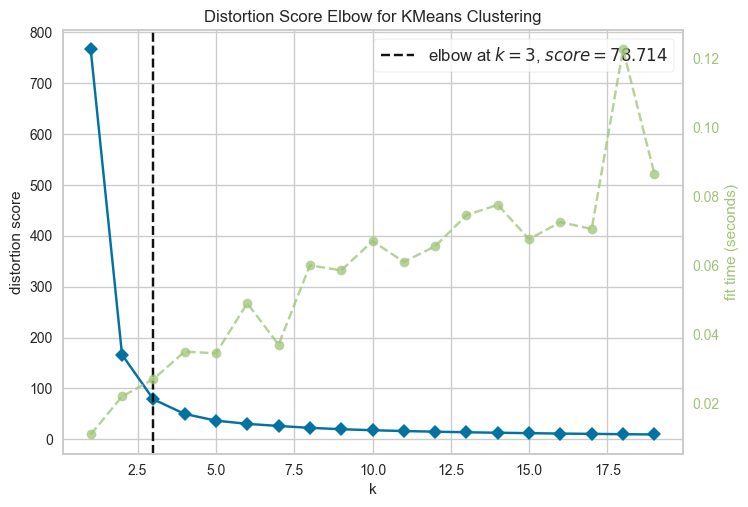

In [556]:
#another way to show number of cluster
kmeans = KMeans(init='k-means++', random_state=44)
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(X_train)
visualizer.show()
plt.show()

In [557]:
#Number Of Cluster 3
KMeansModel = KMeans(n_clusters=3,init='k-means++', random_state=44,algorithm= 'auto')
y=KMeansModel.fit_predict(X_train)
print('KMeansModel centers are : ' , KMeansModel.cluster_centers_)
print('KMeansModel labels are : ' , KMeansModel.labels_)
print('KMeansModel intertia is : ' , KMeansModel.inertia_)
print('KMeansModel No. of iteration is : ' , KMeansModel.n_iter_)

KMeansModel centers are :  [[0.1108317  0.10571184]
 [0.90359052 0.89431264]
 [0.4156844  0.40874382]]
KMeansModel labels are :  [2 0 2 ... 0 0 0]
KMeansModel intertia is :  78.7145723787079
KMeansModel No. of iteration is :  9


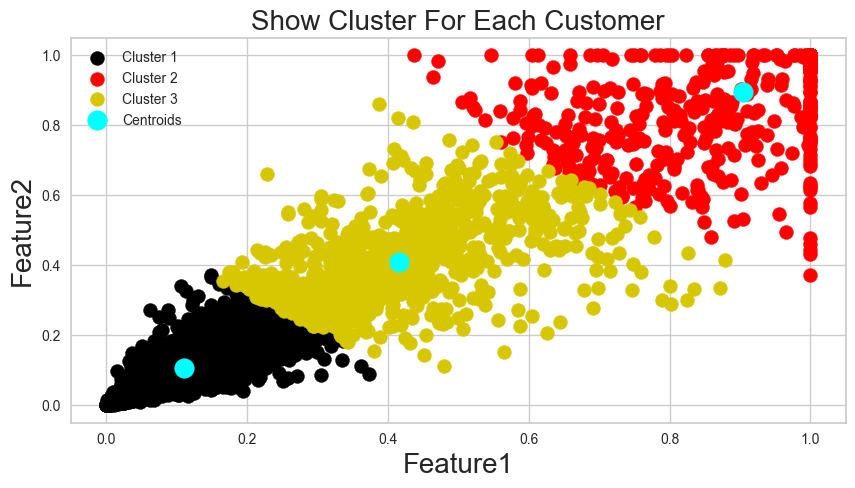

In [558]:
# plotting all the clusters and their Centroids
plt.figure(figsize=(10,5))
plt.scatter(X_train.iloc[y==0,0], X_train.iloc[y==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_train.iloc[y==1,0], X_train.iloc[y==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_train.iloc[y==2,0], X_train.iloc[y==2,1], s=100, c='y', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

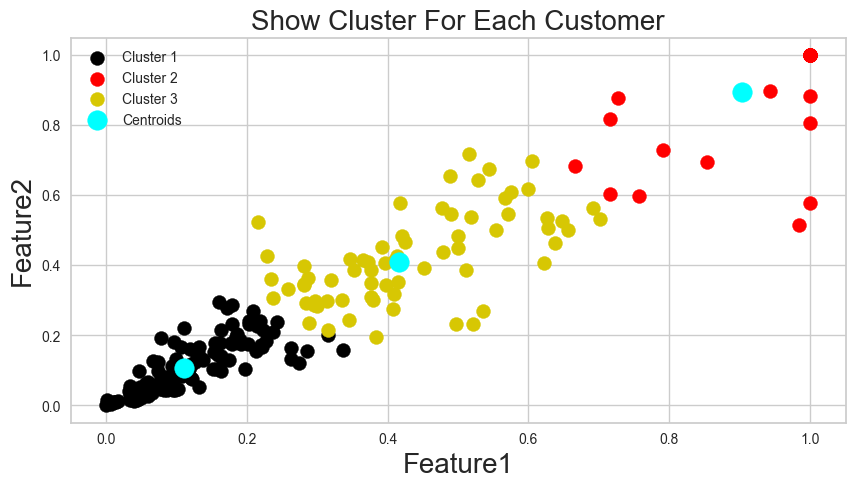

In [559]:
# plotting all the clusters and their Centroids
y_pred=KMeansModel.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X_test.iloc[y_pred==0,0], X_test.iloc[y_pred==0,1], s=100, c='black', label='Cluster 1')
plt.scatter(X_test.iloc[y_pred==1,0], X_test.iloc[y_pred==1,1], s=100, c='red', label='Cluster 2')
plt.scatter(X_test.iloc[y_pred==2,0], X_test.iloc[y_pred==2,1], s=100, c='y', label='Cluster 3')
# plot the centroids
plt.scatter(KMeansModel.cluster_centers_[:,0],KMeansModel.cluster_centers_[:,1], s=200, c='cyan', label='Centroids')
plt.title('Show Cluster For Each Customer',fontsize=20)
plt.xlabel('Feature1',fontsize=20)
plt.ylabel('Feature2',fontsize=20)
plt.legend()
plt.show()

In [560]:
silhouette_avg = silhouette_score(X_train, y)
print(f'Silhouette Score train: {silhouette_avg}')
silhouette_avg = silhouette_score(X_test, y_pred)
print(f'Silhouette Score test: {silhouette_avg}')

Silhouette Score train: 0.6282541158142403
Silhouette Score test: 0.5847613992380583
